<a href="https://colab.research.google.com/github/saka-21/colab_sample/blob/main/simpledeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## データの読み込み

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd


iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(iris.data[:10])
# print(iris.target[:10])
# print(iris.feature_names)
# print(iris.data.shape)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)

## 訓練データとテストデータ

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


## モデルの構築

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
______________________________________________________

学習

In [8]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 1ms/step - loss: 1.1044 - accuracy: 0.4273
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.6648
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.8058
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.7647
Epoch 5/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7687 - accuracy: 0.7814
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7074 - accuracy: 0.8188
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.8243
Epoch 8/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.8356
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.8356
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.9012
Epoch 11/30
14/14 [

# 学習の推移

In [13]:
history.history

{'accuracy': [0.5178571343421936,
  0.6964285969734192,
  0.7767857313156128,
  0.7767857313156128,
  0.7946428656578064,
  0.8125,
  0.8035714030265808,
  0.8482142686843872,
  0.8392857313156128,
  0.8571428656578064,
  0.8571428656578064,
  0.875,
  0.8928571343421936,
  0.8928571343421936,
  0.9017857313156128,
  0.9017857313156128,
  0.9285714030265808,
  0.9107142686843872,
  0.9196428656578064,
  0.9196428656578064,
  0.9196428656578064,
  0.9285714030265808,
  0.9285714030265808,
  0.9375,
  0.9285714030265808,
  0.9464285969734192,
  0.9553571343421936,
  0.9464285969734192,
  0.9464285969734192,
  0.9553571343421936],
 'loss': [1.0747283697128296,
  0.9761033058166504,
  0.8942586779594421,
  0.8182381391525269,
  0.7517632842063904,
  0.6928616762161255,
  0.6424784660339355,
  0.5973705649375916,
  0.558320164680481,
  0.5228617191314697,
  0.4923800826072693,
  0.4659627079963684,
  0.44159436225891113,
  0.42052486538887024,
  0.4014485776424408,
  0.3851237893104553,
  0

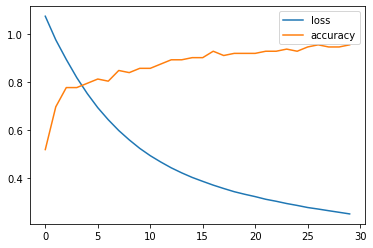

In [16]:
import matplotlib.pyplot as plt
hist_loss = history.history['loss']
hist_accuracy = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_accuracy)), hist_accuracy, label='accuracy')
plt.legend()
plt.show()

# 評価

In [19]:
model.evaluate(x_test, t_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.8947


[0.2668571174144745, 0.8947368264198303]

In [18]:
loss, accuracy = model.evaluate(x_test, t_test)
print('loss: {}'.format(loss))
print('accuracy: {}'.format(accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.8947
loss: 0.2668571174144745
accuracy: 0.8947368264198303


# 予測

In [30]:
x_test

array([[-1.02184904e+00,  5.58610819e-01, -1.34022653e+00,
        -1.31544430e+00],
       [ 1.28034050e+00,  9.82172869e-02,  7.62758269e-01,
         1.44883158e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.18381211e+00],
       [ 1.15917263e+00, -1.31979479e-01,  9.90107977e-01,
         1.18556721e+00],
       [ 1.40150837e+00,  3.28414053e-01,  5.35408562e-01,
         2.64141916e-01],
       [ 7.95669016e-01, -1.31979479e-01,  1.16062026e+00,
         1.31719939e+00],
       [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
        -1.44707648e+00],
       [ 5.53333275e-01, -3.62176246e-01,  1.04694540e+00,
         7.90670654e-01],
       [ 5.53333275e-01,  7.88807586e-01,  1.04694540e+00,
         1.58046376e+00],
       [ 1.89829664e-01, -1.97355361e+00,  7.05920842e-01,
         3.95774101e-01],
       [-9.00681170e-01,  1.70959465e+00, -1.22655167e+00,
        -1.31544430e+00],
       [ 5.53333275e-01, -5.92373012e-01,  7.62758269e-01,
      

In [26]:
model.predict(x_test)

array([[0.9662299 , 0.02475159, 0.00901848],
       [0.00557722, 0.09182548, 0.90259737],
       [0.9492079 , 0.03943812, 0.01135389],
       [0.00628622, 0.11156774, 0.882146  ],
       [0.05125345, 0.5249983 , 0.42374825],
       [0.0048686 , 0.07841704, 0.91671443],
       [0.9897188 , 0.00780636, 0.00247482],
       [0.01663194, 0.23071417, 0.75265384],
       [0.00665185, 0.09380068, 0.8995475 ],
       [0.01171856, 0.8250554 , 0.16322611],
       [0.983073  , 0.01256923, 0.00435777],
       [0.03465986, 0.48514795, 0.48019218],
       [0.00741013, 0.12781872, 0.8647712 ],
       [0.13241188, 0.7057222 , 0.16186583],
       [0.07258963, 0.7998689 , 0.12754148],
       [0.00480673, 0.13081345, 0.8643798 ],
       [0.03156934, 0.3276057 , 0.6408249 ],
       [0.969388  , 0.02287442, 0.00773757],
       [0.0014038 , 0.05100304, 0.94759315],
       [0.06581091, 0.5684935 , 0.36569563],
       [0.97312444, 0.0197104 , 0.00716518],
       [0.9670579 , 0.02537616, 0.00756601],
       [0.

# モデルを保存

In [31]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')